<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-checo0228/blob/main/SEP/Ejercicios/02_SEP_23_Ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sergio Eduardo López Lázaro - 02/SEP/23 - Ejercicio


Para el conjunto de datos adjunto, las columnas corresponden a Tamaño de la casa, número de habitaciones, número de pisos, años de antigüedad y costo.

Para dicho conjunto de datos realizar lo siguiente:

1. Explorar los datos, realiza gráficas del costo de las casas como función de cada característica.
2. Ajustar un modelo lineal usando todas las características, usando el método de gradiente descendiente. Determinar el valor del parámetro de aprendizaje que mejor funciona para este caso.
3. Normaliza las características y ajusta un nuevo modelo lineal, nuevamente determina el valor del parámetro de aprendizaje.
4. Usa el modelo obtenido para predecir el valor de una casa con las siguientes características

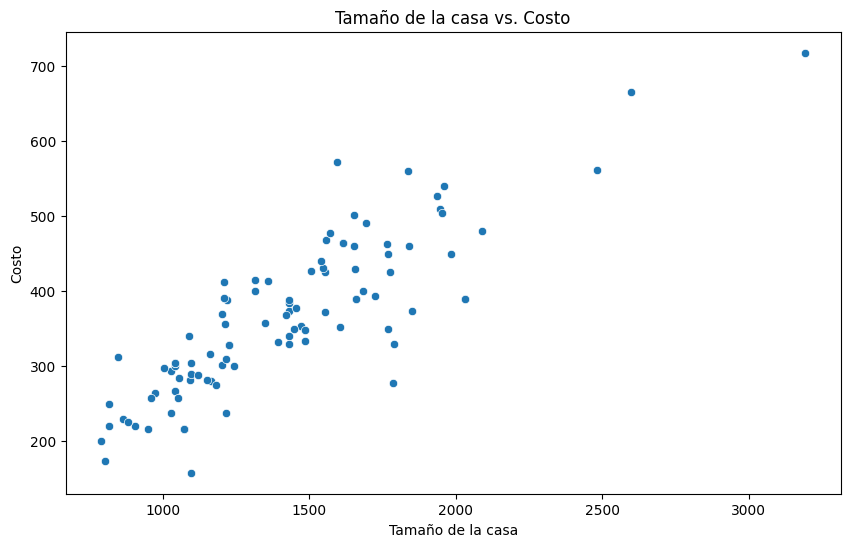

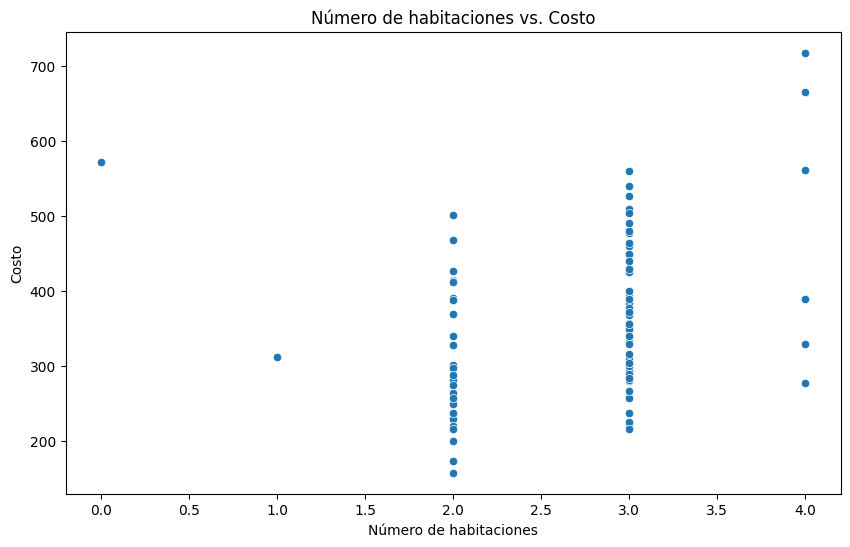

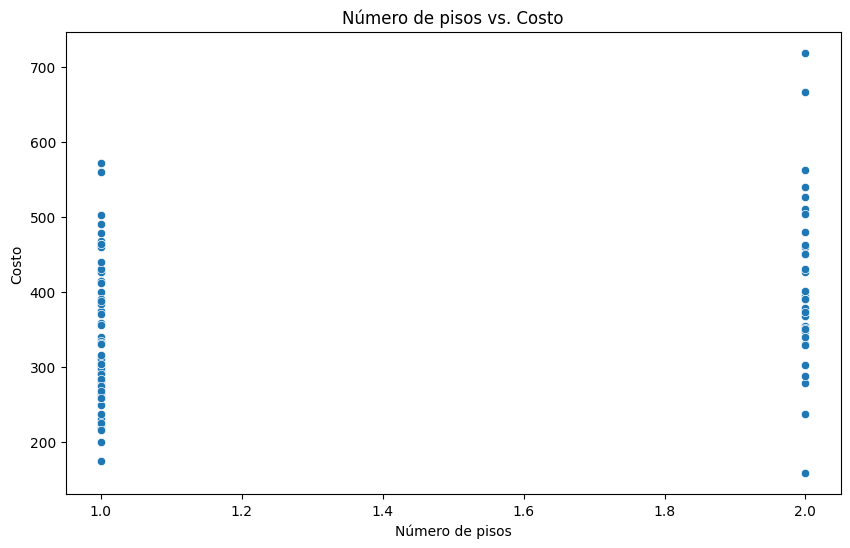

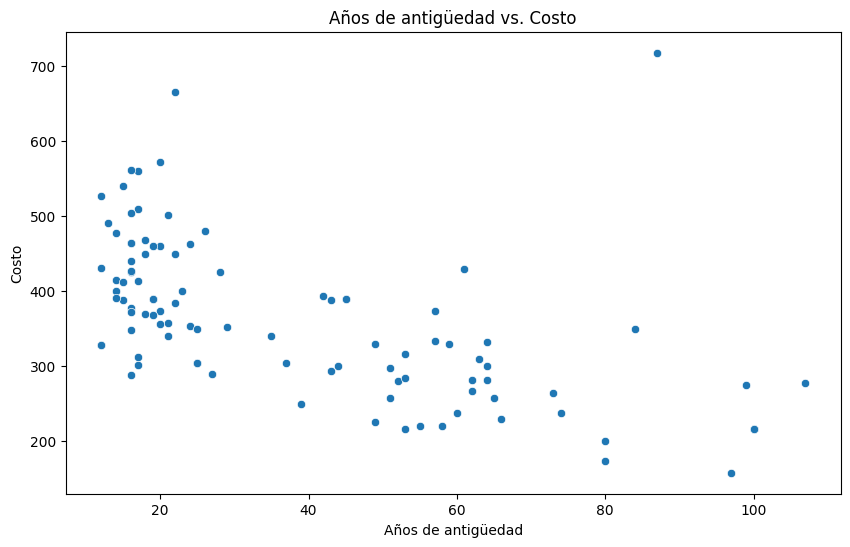

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo de texto (asegúrate de proporcionar la ubicación correcta del archivo)
df = pd.read_csv('datos_casas.txt', delimiter=',')

# Asignar nombres de columna predeterminados
df.columns = ['Tamano de la casa', 'Número de habitaciones', 'Número de pisos', 'Años de antigüedad', 'Costo']

# Tamaño de la casa vs. Costo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tamano de la casa', y='Costo', data=df)
plt.title('Tamaño de la casa vs. Costo')
plt.xlabel('Tamaño de la casa')
plt.ylabel('Costo')
plt.show()

# Número de habitaciones vs. Costo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Número de habitaciones', y='Costo', data=df)
plt.title('Número de habitaciones vs. Costo')
plt.xlabel('Número de habitaciones')
plt.ylabel('Costo')
plt.show()

# Número de pisos vs. Costo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Número de pisos', y='Costo', data=df)
plt.title('Número de pisos vs. Costo')
plt.xlabel('Número de pisos')
plt.ylabel('Costo')
plt.show()

# Años de antigüedad vs. Costo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Años de antigüedad', y='Costo', data=df)
plt.title('Años de antigüedad vs. Costo')
plt.xlabel('Años de antigüedad')
plt.ylabel('Costo')
plt.show()


2. Ajustar un modelo lineal usando todas las características, usando el método de gradiente descendiente. Determinar el valor del parámetro de aprendizaje que mejor funciona para este caso.

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold

# Cargar los datos desde el DataFrame de Pandas
data = pd.read_csv('datos_casas.txt', delimiter=',')

# Agregar una columna de unos para el término de sesgo (intercepto)
data.insert(0, 'Ones', 1)

# Obtener el número de características (incluido el término de sesgo)
num_features = data.shape[1] - 1  # Restamos 1 para excluir la columna de costo

# Convertir los datos a matrices NumPy
X = np.array(data.iloc[:, :-1])  # Características (incluido el término de sesgo)
y = np.array(data.iloc[:, -1]).reshape(-1, 1)  # Variable objetivo, asegurándose de que sea una matriz (m, 1)

# Definir un rango de valores de alpha para probar
alpha_values = [0.0000001,0.001, 0.01, 0.1, 0.5, 1.0]

# Realizar validación cruzada para encontrar el mejor alpha
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for alpha in alpha_values:
    mse_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        m = len(y_train)

        # Inicializar los parámetros del modelo
        theta_initial = np.zeros((num_features, 1))  # num_features x 1

        # Implementar el gradiente descendente
        def gradient_descent(X, y, theta, alpha, num_iterations):
            cost_history = []

            for _ in range(num_iterations):
                error = X.dot(theta) - y
                gradient = X.T.dot(error) / m
                theta -= alpha * gradient
                cost = np.sum(error ** 2) / (2 * m)
                cost_history.append(cost)

            return theta, cost_history

        num_iterations = 10  # Puedes ajustar este valor según sea necesario

        # Ejecutar el gradiente descendente en el conjunto de entrenamiento
        optimal_theta, _ = gradient_descent(X_train, y_train, theta_initial, alpha, num_iterations)

        # Calcular el MSE en el conjunto de validación
        predictions = X_val.dot(optimal_theta)
        mse = np.mean((predictions - y_val) ** 2)
        mse_scores.append(mse)

    # Calcular el promedio del MSE en las particiones de validación
    average_mse = np.mean(mse_scores)

    results.append({'alpha': alpha, 'Average MSE': average_mse})

# Imprimir los resultados
for result in results:
    print(f"Alpha: {result['alpha']}, Average MSE: {result['Average MSE']}")

# Seleccionar el valor de alpha que minimiza el promedio del MSE
best_alpha = min(results, key=lambda x: x['Average MSE'])['alpha']
print(f"El valor óptimo de alpha es: {best_alpha}")


Alpha: 1e-07, Average MSE: 4244.586324710484
Alpha: 0.001, Average MSE: 8.834039110762187e+71
Alpha: 0.01, Average MSE: 8.906663079145592e+91
Alpha: 0.1, Average MSE: 8.913956600819334e+111
Alpha: 0.5, Average MSE: 8.501630009150078e+125
Alpha: 1.0, Average MSE: 8.914686265084805e+131
El valor óptimo de alpha es: 1e-07


3. Normaliza las características y ajusta un nuevo modelo lineal, nuevamente determina el valor del parámetro de aprendizaje.


In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold

# Cargar los datos desde el DataFrame de Pandas
data = pd.read_csv('datos_casas.txt', delimiter=',')

# Normalizar las características (excluyendo el término de sesgo)
data.iloc[:, 1:] = (data.iloc[:, 1:] - data.iloc[:, 1:].mean()) / data.iloc[:, 1:].std()

# Agregar una columna de unos para el término de sesgo (intercepto)
data.insert(0, 'Ones', 1)

# Obtener el número de características (incluido el término de sesgo)
num_features = data.shape[1] - 1  # Restamos 1 para excluir la columna de costo

# Convertir los datos a matrices NumPy
X = np.array(data.iloc[:, :-1])  # Características (incluido el término de sesgo)
y = np.array(data.iloc[:, -1]).reshape(-1, 1)  # Variable objetivo, asegurándose de que sea una matriz (m, 1)

# Definir un rango de valores de alpha para probar
alpha_values = [0.0000001,0.001, 0.01, 0.1, 0.5, 1.0]

# Realizar validación cruzada para encontrar el mejor alpha
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for alpha in alpha_values:
    mse_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        m = len(y_train)

        # Inicializar los parámetros del modelo
        theta_initial = np.zeros((num_features, 1))  # num_features x 1

        # Implementar el gradiente descendente
        def gradient_descent(X, y, theta, alpha, num_iterations):
            cost_history = []

            for _ in range(num_iterations):
                error = X.dot(theta) - y
                gradient = X.T.dot(error) / m
                theta -= alpha * gradient
                cost = np.sum(error ** 2) / (2 * m)
                cost_history.append(cost)

            return theta, cost_history

        num_iterations = 10  # Puedes ajustar este valor según sea necesario

        # Ejecutar el gradiente descendente en el conjunto de entrenamiento
        optimal_theta, _ = gradient_descent(X_train, y_train, theta_initial, alpha, num_iterations)

        # Calcular el MSE en el conjunto de validación
        predictions = X_val.dot(optimal_theta)
        mse = np.mean((predictions - y_val) ** 2)
        mse_scores.append(mse)

    # Calcular el promedio del MSE en las particiones de validación
    average_mse = np.mean(mse_scores)

    results.append({'alpha': alpha, 'Average MSE': average_mse})

# Imprimir los resultados
for result in results:
    print(f"Alpha: {result['alpha']}, Average MSE: {result['Average MSE']}")

# Seleccionar el valor de alpha que minimiza el promedio del MSE
best_alpha = min(results, key=lambda x: x['Average MSE'])['alpha']
print(f"El valor óptimo de alpha es: {best_alpha}")


Alpha: 1e-07, Average MSE: 0.9576647076208726
Alpha: 0.001, Average MSE: 4.1581422670013894e+65
Alpha: 0.01, Average MSE: 4.192171846098321e+85
Alpha: 0.1, Average MSE: 4.19558931927918e+105
Alpha: 0.5, Average MSE: 4.001515600911138e+119
Alpha: 1.0, Average MSE: 4.1959312121442886e+125
El valor óptimo de alpha es: 1e-07


Gráficar la función costo


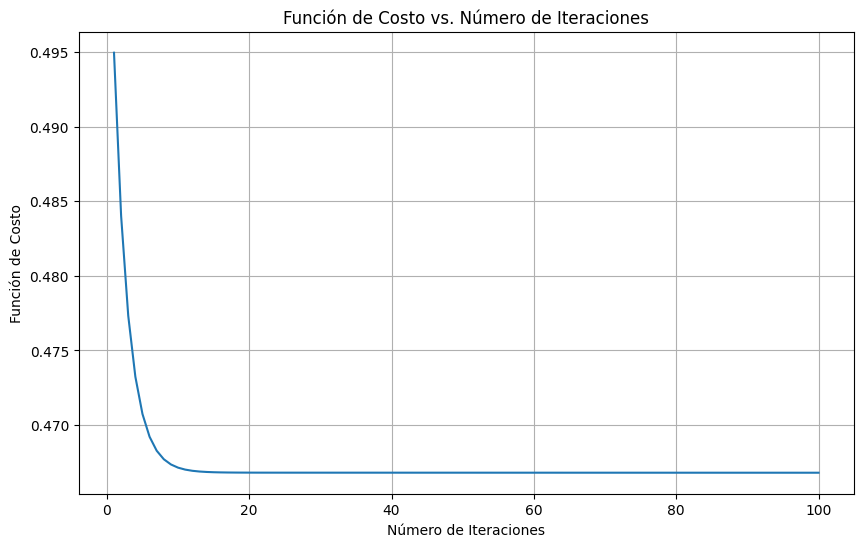

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el DataFrame de Pandas
data = pd.read_csv('datos_casas.txt', delimiter=',')

# Normalizar las características (excluyendo el término de sesgo)
data.iloc[:, 1:] = (data.iloc[:, 1:] - data.iloc[:, 1:].mean()) / data.iloc[:, 1:].std()

# Agregar una columna de unos para el término de sesgo (intercepto)
data.insert(0, 'Ones', 1)

# Obtener el número de características (incluido el término de sesgo)
num_features = data.shape[1] - 1  # Restamos 1 para excluir la columna de costo

# Convertir los datos a matrices NumPy
X = np.array(data.iloc[:, :-1])  # Características (incluido el término de sesgo)
y = np.array(data.iloc[:, -1]).reshape(-1, 1)  # Variable objetivo, asegurándose de que sea una matriz (m, 1)

# Definir los parámetros iniciales del modelo
theta_initial = np.zeros((num_features, 1))  # num_features x 1

# Implementar el gradiente descendente
def gradient_descent(X, y, theta, alpha, num_iterations):
    cost_history = []

    m = len(y)

    for _ in range(num_iterations):
        error = X.dot(theta) - y
        gradient = X.T.dot(error) / m
        theta -= alpha * gradient
        cost = np.sum(error ** 2) / (2 * m)
        cost_history.append(cost)

    return cost_history

# Configurar hiperparámetros
alpha = 0.0000001  # Tasa de aprendizaje
num_iterations = 100  # Número de iteraciones

# Ejecutar el gradiente descendente
cost_history = gradient_descent(X, y, theta_initial, alpha, num_iterations)

# Graficar la función de costo en función del número de iteraciones
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), cost_history)
plt.title('Función de Costo vs. Número de Iteraciones')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Función de Costo')
plt.grid(True)
plt.show()


Usa el modelo obtenido para predecir el valor de una casa con las siguientes características : tamaño=1200, num. habitaciones=3, pisos=1, años=4


In [85]:
# Características de predicción
tamanio = 1200
num_habitaciones = 3
num_pisos = 1
anios = 4

# Agrega el término de sesgo (intercepto)
features_norm = [1, tamanio, num_habitaciones, num_pisos, anios]

# Convierte las características de predicción a un array NumPy
x_pred = np.array(features_norm).reshape(1, -1)  # Reshape para que sea (1, num_features)

# Usa el modelo entrenado para hacer la predicción
predicted_cost = x_pred.dot(optimal_theta)  # optimal_theta es el resultado del entrenamiento del modelo

# Imprime la predicción
print("El costo estimado de la casa es:", predicted_cost[0, 0])


El costo estimado de la casa es: -6.604108061368851e+62


In [101]:
import numpy as np

theta0 = 0.0000001
theta1 = 0.01
theta2 = 0.1
theta3 = 0.5
theta4 = 1.0


# Parámetros del modelo (coeficientes)
optimal_theta = np.array([theta0, theta1, theta2, theta3, theta4])

# Características de predicción (sin normalizar)
tamanio = 1200
num_habitaciones = 3
num_pisos = 1
anios = 4

# Agrega el término de sesgo (intercepto)
features = [1, tamanio, num_habitaciones, num_pisos, anios]

# Convierte las características de predicción a un array NumPy
x_pred = np.array(features).reshape(1, -1)  # Reshape para que sea (1, num_features)

# Usa el modelo entrenado para hacer la predicción
predicted_cost = x_pred.dot(optimal_theta)

# Imprime la predicción
print("El costo estimado de la casa es:", predicted_cost[0])


El costo estimado de la casa es: 16.8000001
